# Executive Sumary 

## Purpos:
This project aims to analyze the sales of 45 Walmart stores between 2010-01-10' to '2012-12-10'

## Goal

Use 143 weeks of data to find a time series model that will allow us to predicti weekly sales.

# Plan
Acquire and prepare Walmart sales found on kaggle.com. 
Analysis based on Classification modeling and ran through the data pipeline.
A copy of the cleaned dataset is available below.

In [1]:
import pandas as pd
import numpy as np
import os
from env import host, user, password


from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

import wrangle
import viz

%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# supress scientific notation
# np.set_printoptions(suppress=True)
plt.rcParams["axes.formatter.limits"] = (-5, 12)
# pd.options.display.float_format = '{:.2f}'.format

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('fivethirtyeight')



# Acquire Walmart Weekly Sales

In [2]:
# Acquire  
df = wrangle.get_walmart_data()
df.head(2)

Data is cached. Reading data from .csv file.
Acquisition complete


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


## Prepare

In [3]:
# Prepare
df = wrangle.new_walmart_data(df)
df.head(2)

,store,weekly_sales,holiday_flag,temperature,fuel_price,consumer_price_index,unemployment
date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-05,10,2193048.75,0,54.34,2.962,126.442065,9.765


## Split



In [4]:
# Split data into train and test 
# Data does not contain more than two cycles
train, test = wrangle.split_walmart_data(df)

((3861, 1), (2574, 1), None)

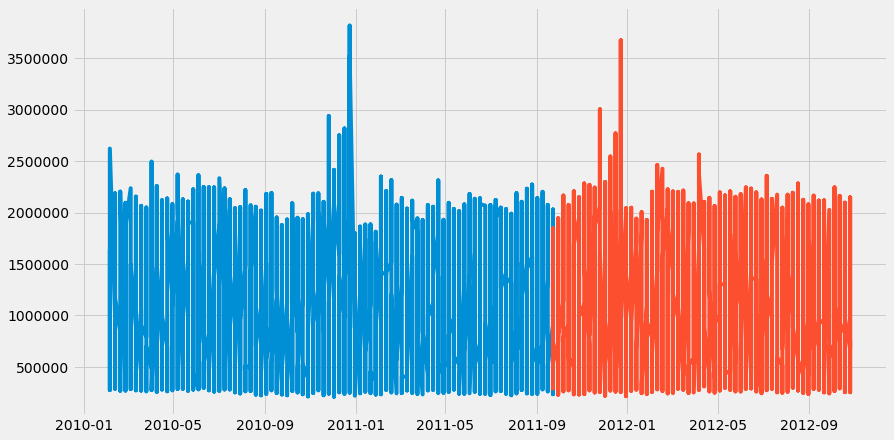

In [5]:
# Let's take a look at our data and its shape
train.shape, test.shape, viz.plot_split(train, test)

## EDA 

In [6]:
# Establish target for prediction
# We want to predict weekly sales. Moving forward, we will learn about trends in data 
y = df.weekly_sales

<AxesSubplot:ylabel='Frequency'>

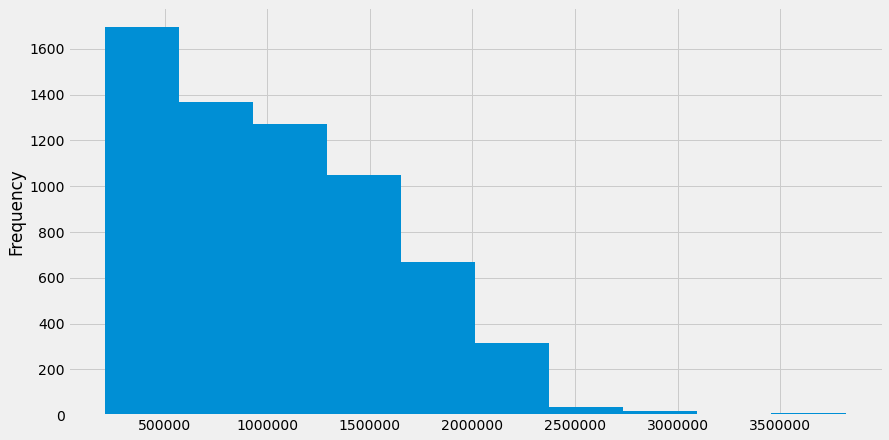

In [7]:
# Target is normally distributed  
y.plot.hist()

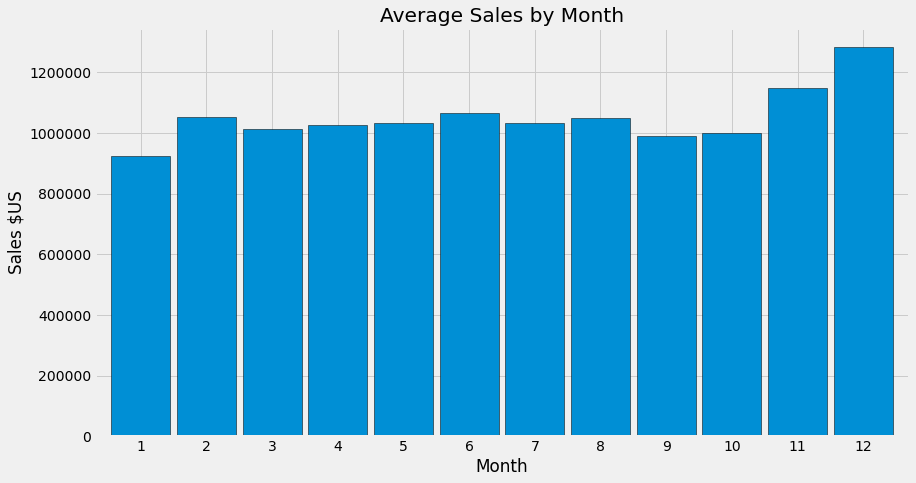

In [8]:
viz.target_average_sales_by_month(y)

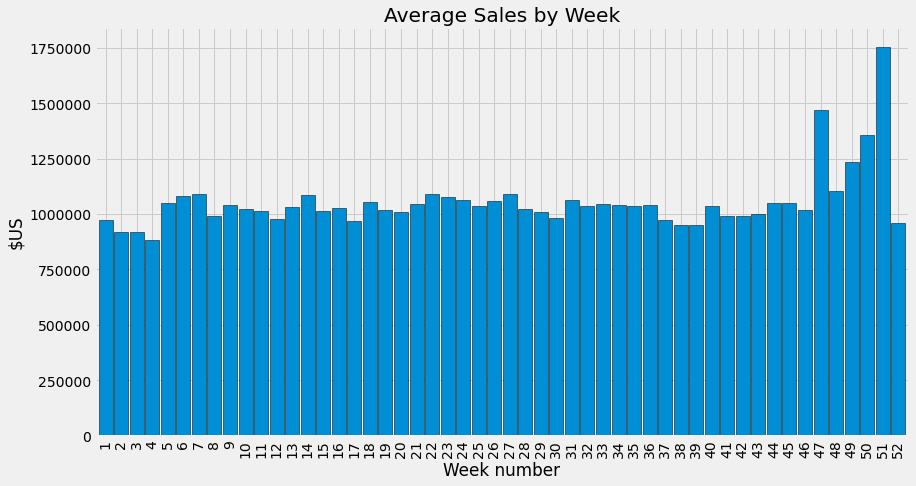

In [9]:
viz.target_average_sales_by_week(y)

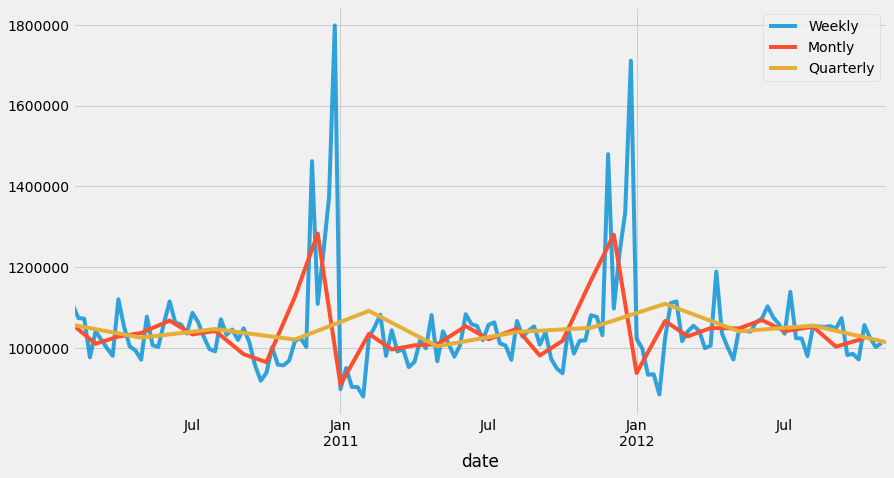

In [10]:
viz.week_month_quarter_running_average(y)

# Takeaway
- Seasonality is evident for November, December, and January
- Normal distribution can be observed
- Week 47 shows seasonality (coincides with Black Friday)
- From the first week of February, sales start to pick up
- Second-quarter seems to have a drop in sales to pick up in summer

--------------

# Modeling/ Forecasting